**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

# **K Nearest Neighbour (KNN)**

[**KNN:**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another. [IBM](https://www.ibm.com/topics/knn#:~:text=Next%20steps-,K%2DNearest%20Neighbors%20Algorithm,of%20an%20individual%20data%20point.)
<br>


<br>

**Pros:**
- No assumptions about data – no need to make additional assumptions, tune several parameters, or build a model. This makes it crucial in nonlinear data case.
<br>

**Cons:**
- Associated computation cost is high as it stores all the training data.
- Requires high memory storage.
- Need to determine the value of K
- Sensitive to outliers and missing values
- Does not work well with large dataset


#### **Task:**    Classification


### **Dataset :** Create synthetic dataset using the make_blobs from sklearn.datasets

### **Imports**

In [1]:
# import all the necessary library needed
import numpy as np # for scientific computing
import matplotlib.pyplot as plt # for visualisation purposes
import seaborn as sns # for advanced statistical visualization
import pandas as pd # for wrangling

# the dataset and the classifier algorithm
from sklearn.datasets import make_blobs # make_blobs
from sklearn.model_selection import train_test_split # to train_test and split the dataset
from sklearn.neighbors import KNeighborsClassifier # K-nn classifier and tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay # accuracy score

# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import time
from mlxtend.plotting import plot_decision_regions # for plotting the decision boundary

### **The dataset**

We will use the make_blobs to generate normally distributed points around a specified center, the function will return 2 arrays:

*   First stores the samples with their coordinates.
*   Second the labels



In [2]:
"""
input an array that contains arrays of the x and y coordinates of the data
target is a 1D array that holds the labels of each data point
"""
inputs, target = make_blobs(n_samples = 1000, centers = [(-3, 3), (0, 0), (2, 2)], # this is to keep the points at the center between the following coordinates
                            random_state=365) # generate 1000 points by setting n_samples = 1000

In [3]:
# .shape shows the dimension of the variable inputs and target
inputs.shape, target.shape

((1000, 2), (1000,))

**Create a dataFrame using the artificially generated dataset:**

In [4]:
# create the dataFrame using pandas
blob_df = pd.DataFrame(data = inputs, columns = ['Feature 1', 'Feature 2'])

In [5]:
# let's see the first five rows of the dataset
blob_df.head()

,Feature 1,Feature 2
0,1.630460,2.094029
1,-2.811252,3.852241
2,0.501051,1.582531
3,-3.624112,3.325318
4,-3.278106,2.359416


In [6]:
# add the target/lables to the dataFrame
blob_df['Target'] = target
blob_df.head()

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0


###**Plotting the database:**

In [7]:
# create a variable for the color palette
knn_palette = sns.color_palette(['#000C1F', '#29757A', '#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

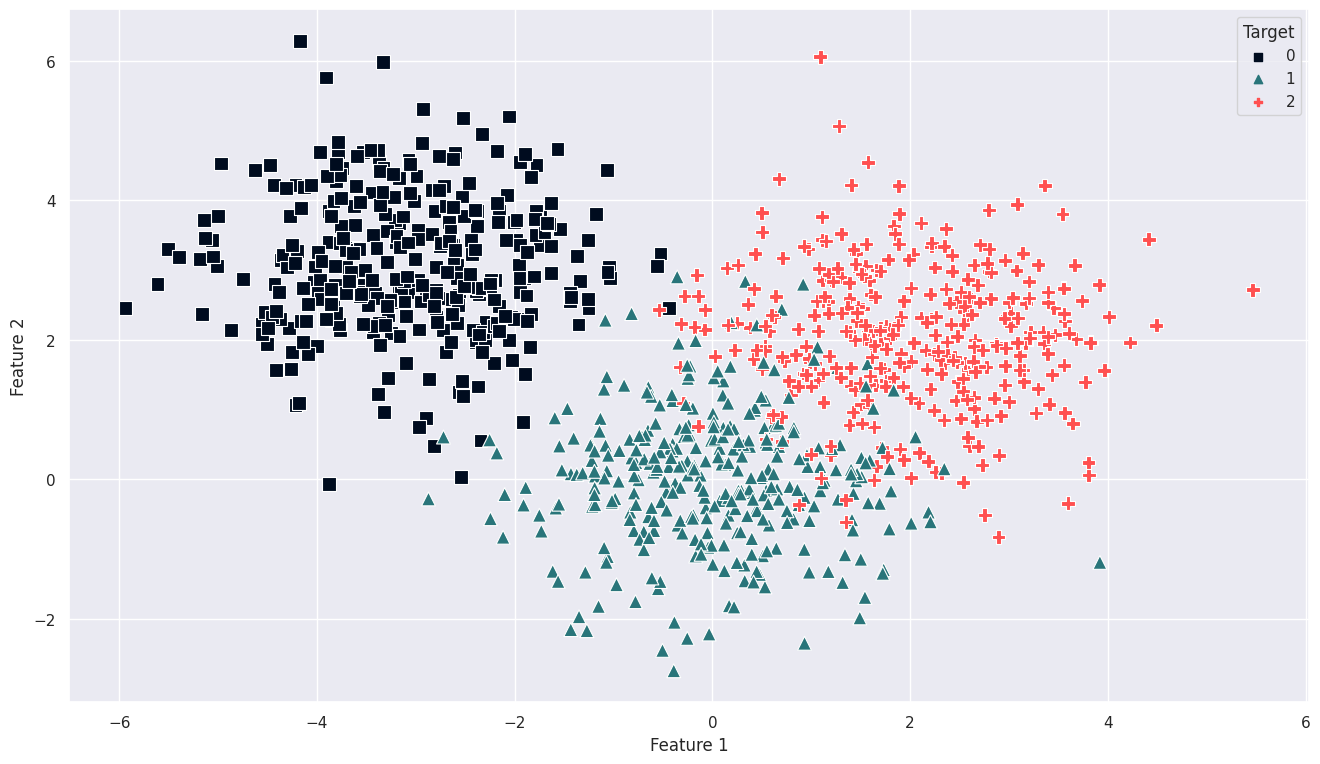

In [8]:
# plot the data using sns .scatterplot
sns.set()

plt.figure(figsize = (16, 9))

sns.scatterplot(x = 'Feature 1', y ='Feature 2',
                data = blob_df,
                hue = 'Target', palette = knn_palette,
                markers = [',', '^', 'P'],
                style = 'Target',
                s = 100
                );

### **Visualizing the distribution of the points:**

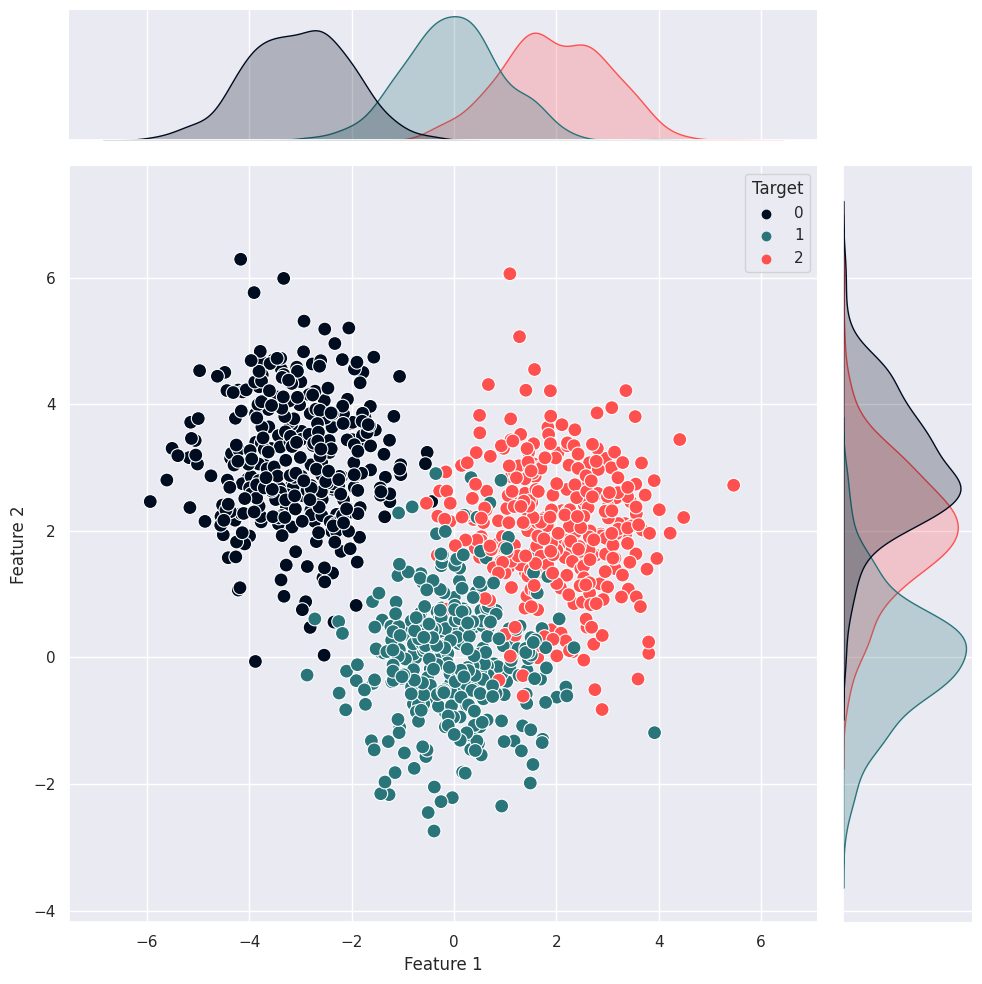

In [9]:
# plot the data using sns .scatterplot
sns.set()

sns.jointplot(x = 'Feature 1', y ='Feature 2',
                data = blob_df,
                hue = 'Target',
                palette = knn_palette,
                height = 10,
                s = 100,
                legend = True
                );

### **Creating a train-test-split:**

In [10]:
# this function takes in the dataset encode it and train_split the values
def encode_and_split(inputs, target):
    # train_test split
    x_train, x_test, y_train, y_test = train_test_split(inputs, # independent or x values
                                                    target, # dependent or x values
                                                    test_size = 0.2, # split the data into 80% training set and 20% test set
                                                    random_state = 365, # for reproducibility
                                                    stratify = target) # so that equal portions enters the training and the test set

    return x_train, x_test, y_train, y_test

In [11]:
# split function
x_train, x_test, y_train, y_test = encode_and_split(inputs, target)

### **Creating the model:**

In [12]:
# instantiate the model
knn_model = KNeighborsClassifier(n_neighbors = 30, weights='uniform') # change the weight from default uniform to distance and the n_neighors to see how the model performs

In [13]:
# fit the training data to the model
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

### **Predicting a sample:**

In [14]:
# now let create a point o with feature_1 and feature_2
feature_one = -0.18
feature_two = 3.2

In [15]:
knn_model.predict([[feature_one, feature_two]])

array([2])

**The model predicts:** that the point o has been assigned to the class 2.

**Let's retrieve the index of the point o:**

In [16]:
neighbors = knn_model.kneighbors([[feature_one, feature_two]])
neighbors

(array([[0.27086818, 0.34749744, 0.40387913, 0.45668128, 0.57370524,
         0.58002987, 0.6147827 , 0.62680551, 0.76674656, 0.77233172,
         0.78175021, 0.84541382, 0.8741025 , 0.8769993 , 0.89014688,
         0.91521046, 0.92223527, 0.99986243, 1.01649367, 1.0231371 ,
         1.03996308, 1.04075309, 1.05202214, 1.05586882, 1.10512231,
         1.14601178, 1.15303035, 1.16564948, 1.16938942, 1.16964811]]),
 array([[336, 215, 679, 221, 690, 688, 269, 309, 543, 100,  79, 161, 708,
         613, 216, 291, 561, 748, 516, 140, 514, 399,  25, 255, 431,   0,
         386, 458,   3, 304]]))

The first value in the array produces the euclidean distance and the second the index of the neighbor in the training test.

### **Visualizing the neighbors:**

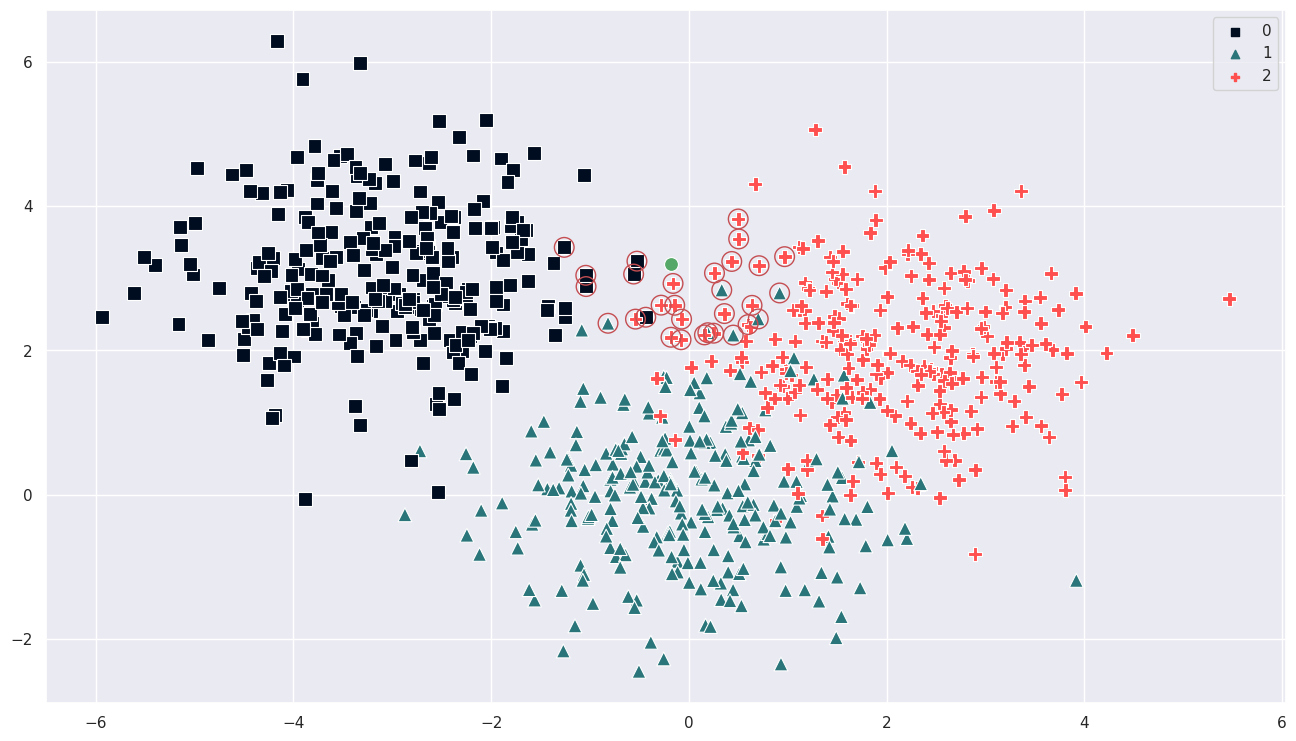

In [17]:
# plot the data using sns .scatterplot
sns.set()

plt.figure(figsize = (16, 9))

# plot the training data
sns.scatterplot(x = x_train[:, 0], y = x_train[:, 1],
                hue = y_train,
                palette = knn_palette,
                markers = [',', '^', 'P'],
                style = y_train,
                s = 100,
                legend = True);


# plot the predicted neighbor
sns.scatterplot(x = [feature_one], y = [feature_two],
                style = [feature_two],
                markers = ['o'],
                s = 100,
                color = 'g',
                legend = False);


""" Plot the neighbors nearest to point o """
plot_x_train = []
plot_y_train = []



# retrieve the coordinates
for i in neighbors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])



# plot a large empty circle at the repective places
plt.scatter(plot_x_train,
            plot_y_train,
            s=200, facecolors='none', edgecolors='r');

### **Getting the parameters of the model:**

In [18]:
# the .get_params() method let you see all the models parameters
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'uniform'}

### **Drawing the decision regions:**

Time elapsed: 60.6 seconds
CPU times: user 49.3 s, sys: 2.03 s, total: 51.4 s
Wall time: 1min


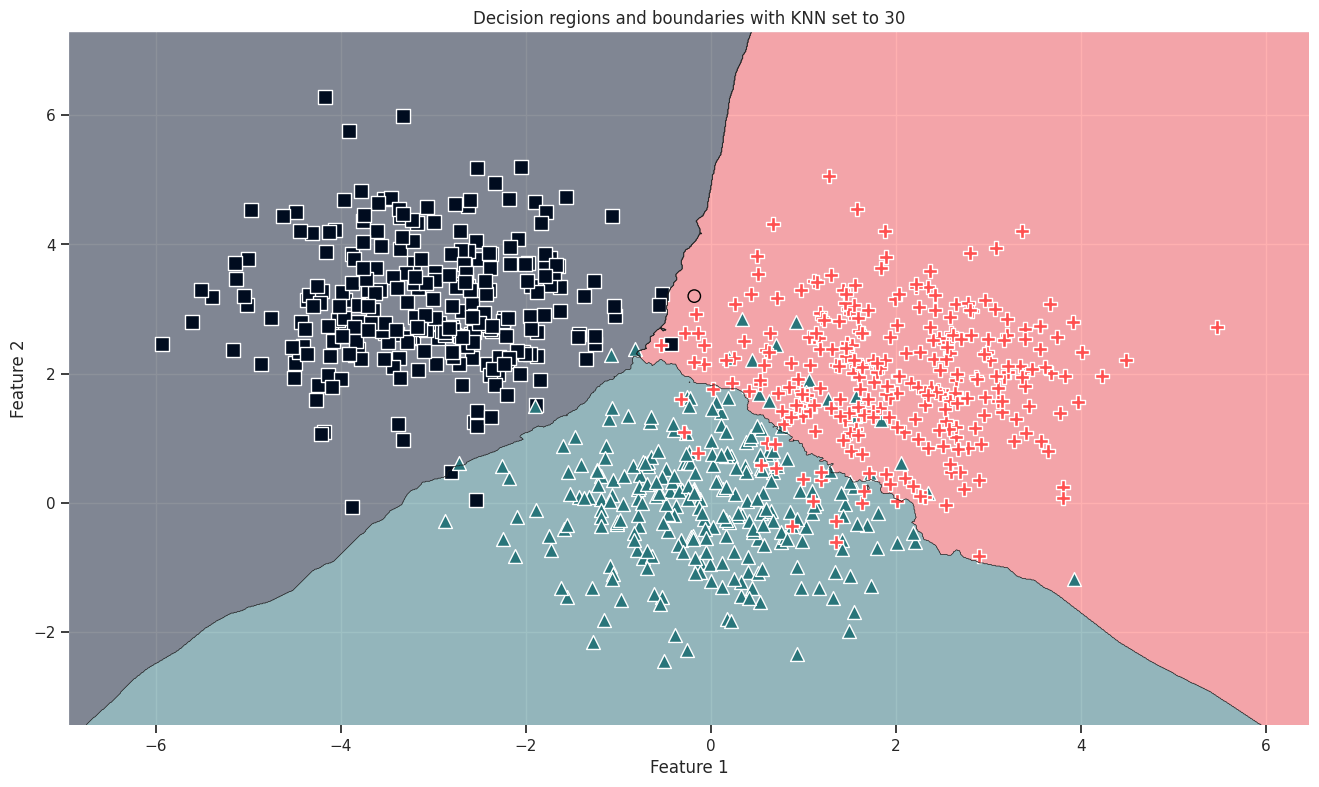

In [19]:
%%time
# code to  plot the decision boundary
start = time.time() # start time

sns.set()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train, y = y_train,
                      X_highlight = np.array([[feature_one, feature_two]]),
                      clf = knn_model,
                      markers = [',', '^', 'P'],
                      colors ='#000c1f,#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0)

plt.xlabel('Feature 1') # xlabel
plt.ylabel('Feature 2'); # ylabel
plt.title("Decision regions and boundaries with KNN set to 30")

end = time.time() # end time

print(f'Time elapsed: {round(end - start, 1)} seconds')

### **Getting the error rates of a set of models:**

In [20]:
error_uniform = []
error_distance = []

k_range = range(1, 51)

for k in k_range:

  # using weights = 'uniform'
  knn_model = KNeighborsClassifier(n_neighbors=k, weights = 'uniform') #instantiate the model with different k and same weight ='unifom' for every iteration
  knn_model.fit(x_train, y_train) # fit the training data
  predictions = knn_model.predict(x_test) # make prediction using the .predict() method
  error_uniform.append(1 - accuracy_score(y_test, predictions)) # append the error values by subtracting the accuracy score from 1


  # using weights = 'distance'
  knn_model = KNeighborsClassifier(n_neighbors=k, weights = 'distance') #instantiate the model with different k and same weight ='unifom' for every iteration
  knn_model.fit(x_train, y_train) # fit the training data
  predictions = knn_model.predict(x_test) # make prediction using the .predict() method
  error_distance.append(1 - accuracy_score(y_test, predictions)) # append the error values by subtracting the accuracy score from 1


### **Plotting the error rates as a function of the number of the neighbors:**

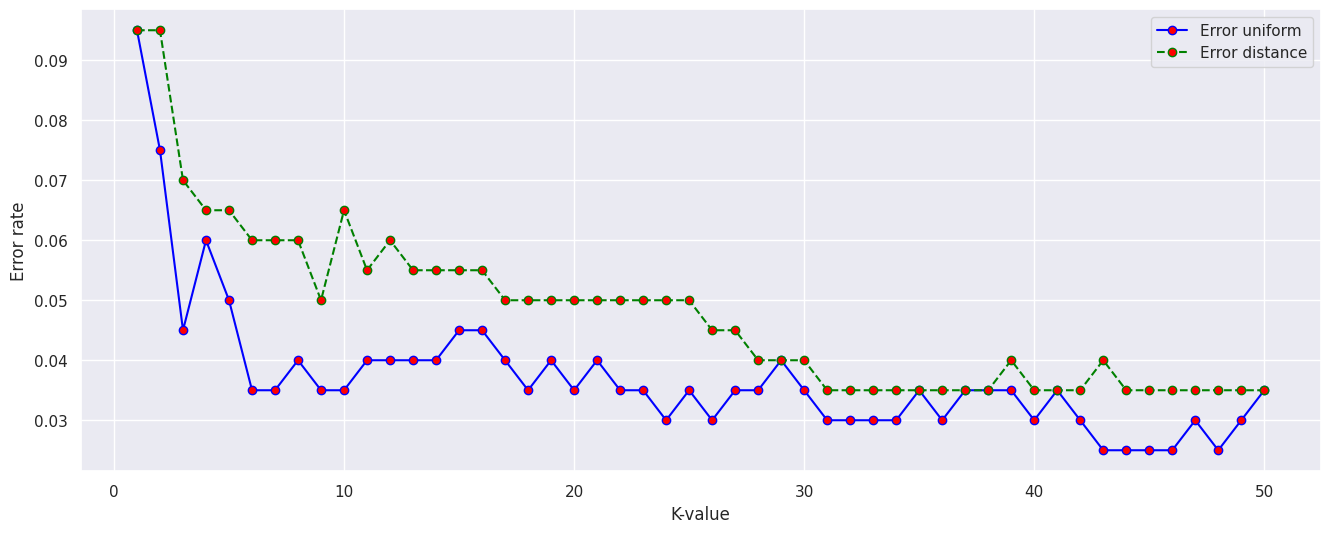

In [21]:
sns.set()

plt.figure(figsize = (16, 6))

# plot errors of uniform weights
plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid',
         marker = 'o', markerfacecolor = 'red', label = 'Error uniform')

# plot errors of distance weights
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', label = 'Error distance')

plt.legend()

plt.xlabel('K-value') # x-label
plt.ylabel('Error rate'); # y-label

### **Choosing a set of parameters to test:**

Using **Grid Search CV:**

In [22]:
# parameters for the gridsearch cross-validation
parameters = {'n_neighbors':range(1, 51),
              'weights': ['uniform', 'distance']}

### **Create an instance of the GridSearchCV class:**

In [23]:
# create an instance of the gridsearchCV
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring ='accuracy')

### **let fit the grid_search with estimator of KNN:**

In [24]:
%%time
grid_search.fit(x_train, y_train)

CPU times: user 2.65 s, sys: 33 ms, total: 2.69 s
Wall time: 2.7 s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

### **see which parameters perform best:**

In [25]:
# check the best parameters
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [26]:
# check the best estimator
new_knn_best = grid_search.best_estimator_

In [27]:
# best estimator
new_knn_best

KNeighborsClassifier(n_neighbors=10)

### **Accuracy:**

In [28]:
# the accuracy
grid_search.best_score_

0.9512499999999999

### **Make predictions on the test dataset:**

In [29]:
# predictions
y_test_pred = new_knn_best.predict(x_test)
y_test_pred.shape

(200,)

### **Construct the confusion matrix:**

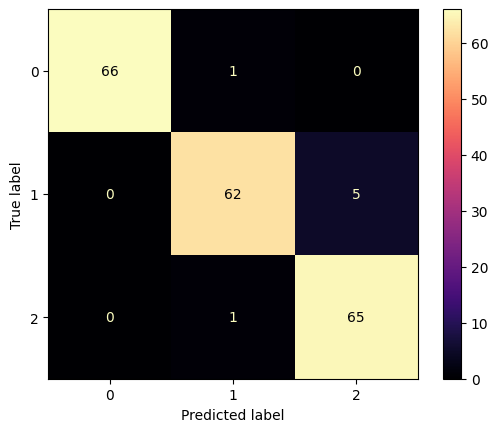

In [30]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = new_knn_best.classes_,
    cmap = 'magma'
);

### **Print out the classification report:**

In [31]:
# print the classification report
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



### **Now over to you:**
- find a dataset you like and apply the KNN algorithm
-  note Knn can also be used for regression task.

# **Best of luck**